# 数据统计

In [1]:
import pandas as pd
import json
def read_jsonl(file_path):
    a=[]
    with open(file_path, 'r') as file:
        
        for line in file:
            json_obj = json.loads(line)
            a.append(json_obj)
    return a



In [1]:
def calculate_average(value1, value2, value3):
    # 计算每个值的 1 - 该值
    adjusted_values = [100 - value for value in (value1, value2, value3)]
    # 计算总和
    total_sum = sum(adjusted_values)
    # 计算平均数
    average = total_sum / len(adjusted_values)
    return average

# 示例调用
result = calculate_average(70.92,80.07, 53.98)
print(result)

31.676666666666666


In [2]:
pwd='/home/ubuntu/hallu_team/junkai/Dataset/RLC-bench/answer/Object'

pope_path='/home/ubuntu/hallu_team/junkai/Dataset/RLC-bench/answer/Object/llava-v1.5/llava-v1.5-7b/answers_object_random.jsonl'
data=read_jsonl(pope_path)
df=pd.DataFrame(data)

In [3]:
df.columns

Index(['image_id', 'query_prompt', 'response', 'label', 'mllm_name', 'type',
       'yes_prob', 'no_prob'],
      dtype='object')

In [4]:
df.loc[0]

image_id                                COCO_val2014_000000310196
query_prompt                   Is there a snowboard in the image?
response        Yes, there is a snowboard in the image, and th...
label                                                         yes
mllm_name                                           llava-v1.5-7b
type                                                 object-YesNo
yes_prob                                                 0.538983
no_prob                                                  0.461017
Name: 0, dtype: object

In [8]:
def filter_and_replace(value):
    value=value.lower()
    if 'yes' in value:
        return 'yes'
    elif 'no' in value:
        return 'no'
    else:
        return value
response_values = df['label'].unique()

In [9]:
response_values

array(['yes', 'no'], dtype=object)

In [10]:
df['response'] = df['response'].apply(filter_and_replace)

[[1362  138]
 [ 174 1326]]


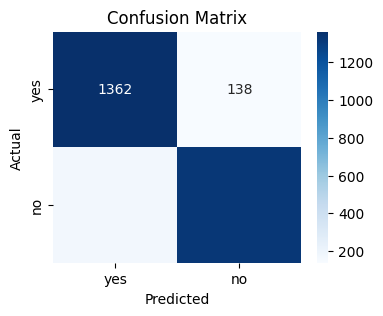

In [17]:

import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(df['label'], df['response'], labels=['yes', 'no'])
print(cm)
# 可视化混淆矩阵
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as patches

data = {"image_id": "713499", "query_prompt": "Is the tile under floor in this photo? Please answer yes or no.", "response": "Yes", "label": "no", "mllm_name": "llava-v1.5-13b", "type": "Yes/No", "yes_prob": 0.5388736128807068, "no_prob": 0.4609230160713196, "top_tokens": {"0": {"tokens": ["innen", "fancy", ")'", "aris", "Datos"], "probabilities": [3.337860107421875e-05, 3.337860107421875e-05, 3.325939178466797e-05, 3.314018249511719e-05, 3.30805778503418e-05]}, "1": {"tokens": ["Unters", "Hinweis", "\u043d\u043e\u0441\u0438", "\u043c\u0438\u043d\u0438", "\u0491"], "probabilities": [4.4286251068115234e-05, 4.363059997558594e-05, 4.3332576751708984e-05, 4.2557716369628906e-05, 4.2438507080078125e-05]}, "2": {"tokens": ["Unters", "\u043d\u043e\u0441\u0438", "Hinweis", "\u0491", "\u0431\u0430\u0439"], "probabilities": [5.5849552154541016e-05, 5.2034854888916016e-05, 5.1140785217285156e-05, 5.0902366638183594e-05, 5.072355270385742e-05]}, "3": {"tokens": ["Unters", "Hinweis", "\u043d\u0435\u0446", "\u043d\u043e\u0441\u0438", "Begriffe"], "probabilities": [8.040666580200195e-05, 7.236003875732422e-05, 7.146596908569336e-05, 7.104873657226562e-05, 6.896257400512695e-05]}, "4": {"tokens": ["Unters", "\u043d\u043e\u0441\u0438", "Hinweis", "\u0491", "\u043a\u043e\u0440"], "probabilities": [9.22083854675293e-05, 9.137392044067383e-05, 8.761882781982422e-05, 8.672475814819336e-05, 8.600950241088867e-05]}, "5": {"tokens": ["Unters", "Hinweis", "\u043d\u043e\u0441\u0438", "\u0491", "cerem"], "probabilities": [0.00013148784637451172, 0.00012636184692382812, 0.00012177228927612305, 0.00011628866195678711, 0.00011539459228515625]}, "6": {"tokens": ["Unters", "Hinweis", "\u043d\u043e\u0441\u0438", "cerem", "\u0491"], "probabilities": [0.0001876354217529297, 0.00018322467803955078, 0.00017690658569335938, 0.0001614093780517578, 0.00015079975128173828]}, "7": {"tokens": ["Unters", "Hinweis", "\u043d\u043e\u0441\u0438", "cerem", "elementos"], "probabilities": [0.0003027915954589844, 0.0002608299255371094, 0.00022804737091064453, 0.00021588802337646484, 0.0001996755599975586]}, "8": {"tokens": ["Unters", "Hinweis", "\u043c\u0456\u043d\u0456", "cerem", "\u043d\u043e\u0441\u0438"], "probabilities": [0.0003693103790283203, 0.00032973289489746094, 0.00025272369384765625, 0.0002512931823730469, 0.0002465248107910156]}, "9": {"tokens": ["Unters", "Hinweis", "\u0431\u044f", "\u043d\u043e\u0441\u0438", "\u0435\u0442\u0430"], "probabilities": [0.0007281303405761719, 0.000576019287109375, 0.0004165172576904297, 0.00039196014404296875, 0.0003638267517089844]}, "10": {"tokens": ["Unters", "\u0431\u044f", "\u0435\u0442\u0430", "Hinweis", "elementos"], "probabilities": [0.0005068778991699219, 0.00040650367736816406, 0.00037980079650878906, 0.0003752708435058594, 0.00037169456481933594]}, "11": {"tokens": ["Unters", "\u0431\u044f", "\u0431\u0440\u0438", "\u0435\u043b", "s\u00ed"], "probabilities": [0.0008053779602050781, 0.0006346702575683594, 0.0004992485046386719, 0.000461578369140625, 0.0004572868347167969]}, "12": {"tokens": ["Unters", "s\u00ed", "\u0431\u044f", "\u0435\u043b", "p\u00f3"], "probabilities": [0.000667572021484375, 0.0006456375122070312, 0.0006103515625, 0.0005645751953125, 0.0005321502685546875]}, "13": {"tokens": ["Unters", "\u0431\u044f", "s\u00ed", "p\u00f3", "yes"], "probabilities": [0.0010614395141601562, 0.0009150505065917969, 0.000820159912109375, 0.0006642341613769531, 0.0006499290466308594]}, "14": {"tokens": ["yes", "Unters", "Yes", "yes", "s\u00ed"], "probabilities": [0.00254058837890625, 0.001247406005859375, 0.0010471343994140625, 0.0008883476257324219, 0.0008478164672851562]}, "15": {"tokens": ["yes", "Yes", "yes", "Unters", "true"], "probabilities": [0.002902984619140625, 0.0012388229370117188, 0.001071929931640625, 0.0009064674377441406, 0.0006656646728515625]}, "16": {"tokens": ["yes", "Yes", "yes", "true", "Yes"], "probabilities": [0.0153656005859375, 0.006282806396484375, 0.004669189453125, 0.00194549560546875, 0.0019235610961914062]}, "17": {"tokens": ["yes", "Yes", "yes", "true", "YES"], "probabilities": [0.1083984375, 0.0540771484375, 0.0185394287109375, 0.00731658935546875, 0.00650787353515625]}, "18": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.1810302734375, 0.0828857421875, 0.02874755859375, 0.01016998291015625, 0.00981903076171875]}, "19": {"tokens": ["yes", "Yes", "yes", "YES", "Yes"], "probabilities": [0.481689453125, 0.20556640625, 0.0455322265625, 0.0192718505859375, 0.0127410888671875]}, "20": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.7109375, 0.236328125, 0.030517578125, 0.006755828857421875, 0.004608154296875]}, "21": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.6591796875, 0.311279296875, 0.0247650146484375, 0.0029811859130859375, 0.0008149147033691406]}, "22": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.6171875, 0.36865234375, 0.01148223876953125, 0.001789093017578125, 0.0002830028533935547]}, "23": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.71142578125, 0.282958984375, 0.004795074462890625, 0.0006189346313476562, 0.00010263919830322266]}, "24": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.57177734375, 0.425048828125, 0.002300262451171875, 0.0005135536193847656, 0.000125885009765625]}, "25": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.8125, 0.18701171875, 0.00034999847412109375, 6.681680679321289e-05, 1.71661376953125e-05]}, "26": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.86328125, 0.1365966796875, 0.00013256072998046875, 1.4424324035644531e-05, 4.76837158203125e-06]}, "27": {"tokens": ["yes", "Yes", "yes", "Yes", "YES"], "probabilities": [0.80810546875, 0.19189453125, 0.00010287761688232422, 1.3053417205810547e-05, 4.5299530029296875e-06]}, "28": {"tokens": ["yes", "Yes", "no", "No", "NO"], "probabilities": [0.6982421875, 0.30029296875, 0.0012664794921875, 0.00011414289474487305, 5.739927291870117e-05]}, "29": {"tokens": ["Yes", "yes", "No", "no", "yes"], "probabilities": [0.93798828125, 0.061859130859375, 0.00010538101196289062, 5.424022674560547e-06, 2.6226043701171875e-06]}, "30": {"tokens": ["Yes", "yes", "No", "no", "yes"], "probabilities": [0.9580078125, 0.042083740234375, 3.838539123535156e-05, 3.814697265625e-06, 1.6689300537109375e-06]}, "31": {"tokens": ["Yes", "yes", "No", "yes", "no"], "probabilities": [0.97705078125, 0.022979736328125, 1.9669532775878906e-05, 8.940696716308594e-07, 8.940696716308594e-07]}, "32": {"tokens": ["Yes", "yes", "No", "yes", "Yes"], "probabilities": [0.99365234375, 0.006488800048828125, 4.76837158203125e-07, 2.980232238769531e-07, 1.7881393432617188e-07]}, "33": {"tokens": ["Yes", "yes", "No", "yes", "Yes"], "probabilities": [0.99755859375, 0.002323150634765625, 1.9669532775878906e-06, 1.1920928955078125e-07, 5.960464477539063e-08]}, "34": {"tokens": ["Yes", "yes", "No", "yes", "<unk>"], "probabilities": [0.9990234375, 0.00075531005859375, 2.8014183044433594e-06, 5.960464477539063e-08, 0.0]}, "35": {"tokens": ["Yes", "yes", "</s>", "<s>", "<unk>"], "probabilities": [0.99951171875, 0.00036835670471191406, 0.0, 0.0, 0.0]}, "36": {"tokens": ["Yes", "yes", "No", "<s>", "<unk>"], "probabilities": [1.0, 3.534555435180664e-05, 1.1920928955078125e-07, 0.0, 0.0]}, "37": {"tokens": ["Yes", "No", "yes", "<s>", "<unk>"], "probabilities": [1.0, 1.9669532775878906e-06, 1.0728836059570312e-06, 0.0, 0.0]}, "38": {"tokens": ["Yes", "yes", "No", "<s>", "<unk>"], "probabilities": [1.0, 1.1920928955078125e-07, 1.1920928955078125e-07, 0.0, 0.0]}, "39": {"tokens": ["Yes", "No", "</s>", "<s>", "<unk>"], "probabilities": [0.76201171875, 0.37744140625, 0.0, 0.0, 0.0]}, "40": {"tokens": ["No", "Yes", "The", "There", "no"], "probabilities": [0.5390625, 0.4609375, 1.4841556549072266e-05, 1.0788440704345703e-05, 9.834766387939453e-06]},"Calibration": {"tokens": ["Yes", "No", "The", "There", "no"],"probabilities": [0.98, 0.01, 1.4841556549072266e-05, 1.0788440704345703e-05, 9.834766387939453e-06]}}}


# 目标层列表
layers = ["Layer 40", "Layer 39", "Layer 38", "Layer 37", "Layer 36", "Layer 33", "Layer 30", "Layer 27", "Layer 24", "Layer 21", "Layer 18", "Layer 15", "Layer 9", "Layer 3"]

# Insert 'after calibration' above 'Layer 40'
layers = [
    "Calibration",  # Inserted here to be above 'Layer 40'
    "Layer 40",
    "Layer 39",
    "Layer 38",
    "Layer 37",
    "Layer 36",
    "Layer 33",
    "Layer 30",
    "Layer 27",
    "Layer 24",
    "Layer 21",
    "Layer 18",
    "Layer 15",
    "Layer 9",
    "Layer 3"
]

result_data = {
    'Layer': [],
    'Top 1': [],
    'Top 2': [],
    'Top 3': [],
    'Top 4': [],
    'Top 5': []
}

probabilities = {
    'Layer': [],
    'Top 1': [],
    'Top 2': [],
    'Top 3': [],
    'Top 4': [],
    'Top 5': []
}

for layer in layers:
    layer_key = layer.split()[1] if 'Layer' in layer else layer  # Handle 'after calibration' differently #layer真正的名字
    if layer_key in data['top_tokens']:
        result_data['Layer'].append(layer)
        probabilities['Layer'].append(layer)
        for i in range(5): #给每一层都加上概率值
            result_data[f'Top {i+1}'].append(data['top_tokens'][layer_key]['tokens'][i])
            probabilities[f'Top {i+1}'].append(data['top_tokens'][layer_key]['probabilities'][i])

df = pd.DataFrame(result_data)
prob_df = pd.DataFrame(probabilities)

fig, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(prob_df.set_index('Layer'), annot=df.set_index('Layer'), fmt='', cmap='Blues', cbar_kws={'label': 'Probability'}, ax=ax)

for text in ax.texts:
    if text.get_text() == 'Calibration':
        text.set_color('red')

plt.title('Probability distributions between layers')
plt.xlabel('Top-5 token probabilities', fontsize=13)
plt.ylabel('Layer', fontsize=13)

output_path = '/home/ubuntu/kening/kening/RLC-bench/RLC-bench/neok_code/expected_next_token.pdf'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"图像已保存到: {output_path}")

In [3]:
import pandas as pd
data=read_jsonl('/home/ubuntu/junkai/RLC-bench/answer/Object/llava-v1.5/llava-v1.5-13b/Object.jsonl')
pd_data=pd.DataFrame(data)

In [10]:


def filter_and_replace(value):
    value=value.lower()
    if 'yes' in value:
        return 'yes'
    elif 'no' in value:
        return 'no'
    else:
        return value
pd_data['response'] = pd_data['response'].apply(filter_and_replace)
pd_data['decision_prob']= pd_data[['yes_prob', 'no_prob']].max(axis=1)
pd_data.head()

,image_id,query_prompt,response,label,mllm_name,type,yes_prob,no_prob,decision_prob
0,COCO_val2014_000000310196,Is there a snowboard in the image?,yes,yes,llava-v1.5-13b,object-YesNo,0.682574,0.317426,0.682574
1,COCO_val2014_000000310196,Is there a backpack in the image?,yes,no,llava-v1.5-13b,object-YesNo,0.763484,0.236516,0.763484
2,COCO_val2014_000000310196,Is there a person in the image?,yes,yes,llava-v1.5-13b,object-YesNo,0.998755,0.001245,0.998755
3,COCO_val2014_000000310196,Is there a car in the image?,no,no,llava-v1.5-13b,object-YesNo,0.020646,0.979354,0.979354
4,COCO_val2014_000000310196,Is there a skis in the image?,yes,yes,llava-v1.5-13b,object-YesNo,0.929440,0.070560,0.929440


In [12]:
pd_rigth=pd_data[pd_data['label']==pd_data['response']]
pd_wrong=pd_data[pd_data['label']!=pd_data['response']]
# obj_pd['decision_prob']= obj_pd[['yes_prob', 'no_prob']].max(axis=1)

In [13]:
pd_wrong['decision_prob'].describe()

count    1421.000000
mean        0.760949
std         0.147985
min         0.503906
25%         0.633410
50%         0.771843
75%         0.893309
max         0.999196
Name: decision_prob, dtype: float64

## deberta 函数修改

In [ ]:
def are_equivalent(label,response , model, tokenizer, device):
        #label is groundtruth;responese is the respone of LLM; 
        def check_implication(label, response):
            inputs = tokenizer(label,response, return_tensors="pt").to(device)
            outputs = model(**inputs)
            logits = outputs.logits
            largest_index = torch.argmax(F.softmax(logits, dim=1))
            return largest_index.cpu().item()
        implication_1 = check_implication(label, response)
        implication_2 = check_implication(response, label)

        assert (implication_1 in [0, 1, 2]) and (implication_2 in [0, 1, 2])
        implications = [implication_1, implication_2]
        semantically_equivalent = (implications[0] == 2) and (implications[1] == 2)# only when both are 2, they are semantically equivalent
        return "yes" if semantically_equivalent else "no"